In [2]:
# data analysis and wrangling
import pandas as pd
import pandas_datareader as web
from pandas_datareader import data
import numpy as np
import datetime

# visualization
import matplotlib.pyplot as plt
%matplotlib inline


In [38]:
import yfinance as yf
import pandas as pd
import datetime
# Define date range
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2024, 4 , 30)
# Define list of technology company stock symbols
stock_list = ['MSFT']
# Create an empty DataFrame to store the data
combined_df = pd.DataFrame()
# Fetch data for each stock and concatenate into combined_df
for symbol in stock_list:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Symbol'] = symbol  # Add a column for the stock symbol
    combined_df = pd.concat([combined_df, data])
# Reset the index to avoid any indexing issues
combined_df.reset_index(inplace=True)
# Display the first few rows of the combined DataFrame for MSFT
print(combined_df[combined_df['Symbol'] == 'MSFT'].head())

[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2010-01-04  30.620001  31.100000  30.590000  30.950001  23.431591  38409100   
1 2010-01-05  30.850000  31.100000  30.639999  30.959999  23.439165  49749600   
2 2010-01-06  30.879999  31.080000  30.520000  30.770000  23.295315  58182400   
3 2010-01-07  30.629999  30.700001  30.190001  30.450001  23.053051  50559700   
4 2010-01-08  30.280001  30.879999  30.240000  30.660000  23.212036  51197400   

  Symbol  
0   MSFT  
1   MSFT  
2   MSFT  
3   MSFT  
4   MSFT  


In [39]:
combined_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431591,38409100,MSFT
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439165,49749600,MSFT
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295315,58182400,MSFT
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053051,50559700,MSFT
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212036,51197400,MSFT


In [40]:
combined_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
3599,2024-04-23,404.239990,408.200012,403.059998,407.570007,407.570007,15734500,MSFT
3600,2024-04-24,409.559998,412.470001,406.779999,409.059998,409.059998,15065300,MSFT
3601,2024-04-25,394.029999,399.890015,388.029999,399.040009,399.040009,40586500,MSFT
3602,2024-04-26,412.170013,413.000000,405.760010,406.320007,406.320007,29694700,MSFT
3603,2024-04-29,405.250000,406.320007,399.190002,402.250000,402.250000,19582100,MSFT


In [41]:
combined_df2=combined_df.reset_index()['Close']

In [42]:
combined_df2.shape

(3604,)

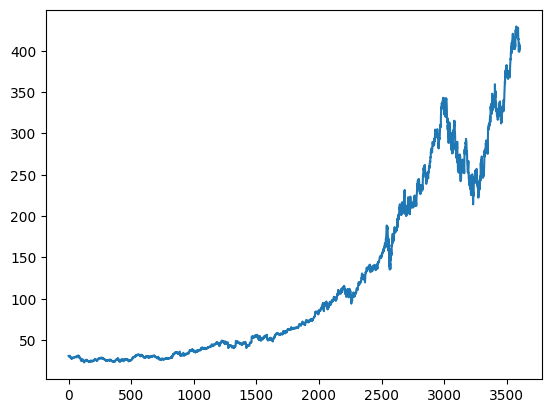

In [43]:
plt.plot(combined_df2)

In [44]:
#convert data to 0-1 range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
combined_df2=scaler.fit_transform(np.array(combined_df2).reshape(-1,1))

In [45]:
combined_df2

array([[0.01953933],
       [0.01956393],
       [0.01909637],
       ...,
       [0.92536178],
       [0.94327693],
       [0.93326116]])

In [46]:
#split the data from training and testing
training_size=int(len(combined_df2)*0.80)
test_size=len(combined_df2)-training_size
train_data,test_data=combined_df2[0:training_size,:],combined_df2[training_size:len(combined_df2),:1]

In [47]:
training_size,test_size

(2883, 721)

In [48]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [49]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [50]:
print(X_train.shape), print(y_train.shape)

(2782, 100)
(2782,)


(None, None)

In [51]:
print(X_test.shape), print(ytest.shape)

(620, 100)
(620,)


(None, None)

In [52]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics="accuracy")

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
44/44 [==============================] - 17s 252ms/step - loss: 0.0041 - accuracy: 3.5945e-04 - val_loss: 0.0025 - val_accuracy: 0.0016
Epoch 2/100
44/44 [==============================] - 9s 212ms/step - loss: 1.4668e-04 - accuracy: 3.5945e-04 - val_loss: 0.0019 - val_accuracy: 0.0016
Epoch 3/100
44/44 [==============================] - 8s 176ms/step - loss: 1.0973e-04 - accuracy: 3.5945e-04 - val_loss: 0.0028 - val_accuracy: 0.0016
Epoch 4/100
44/44 [==============================] - 10s 217ms/step - loss: 1.0819e-04 - accuracy: 3.5945e-04 - val_loss: 0.0022 - val_accuracy: 0.0016
Epoch 5/100
44/44 [==============================] - 10s 228ms/step - loss: 9.5160e-05 - accuracy: 3.5945e-04 - val_loss: 0.0026 - val_accuracy: 0.0016
Epoch 6/100
44/44 [==============================] - 8s 176ms/step - loss: 1.0036e-04 - accuracy: 3.5945e-04 - val_loss: 0.0024 - val_accuracy: 0.0016
Epoch 7/100
44/44 [==============================] - 9s 214ms/step - loss: 9.2615e-05 - accurac

In [22]:
import tensorflow as tf

In [23]:
tf.__version__

'2.15.0'

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

37/37 [==============================] - 1s 36ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

58.24189519618383

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

274.99992366821016

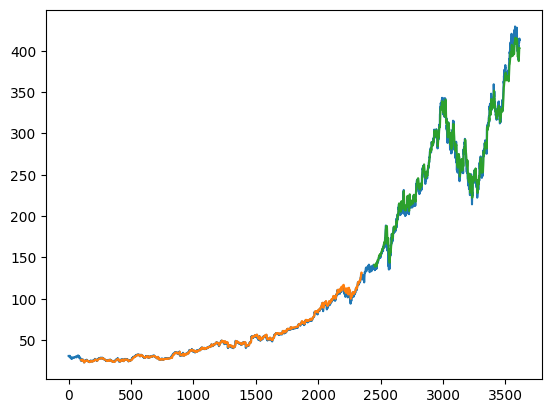

In [28]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(combined_df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(combined_df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(combined_df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(combined_df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
len(test_data)

1265

In [30]:
x_input=test_data[1165:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:

temp_input

[0.8619204989236571,
 0.8554237603626598,
 0.8626095401255939,
 0.8651687931042972,
 0.8653657049333411,
 0.8639137993685406,
 0.8668914336590684,
 0.8687617205356934,
 0.8560389784036697,
 0.855374569955328,
 0.8488286409869991,
 0.8483610692678428,
 0.8654395280942679,
 0.8681465024946835,
 0.885323342135772,
 0.8899006034128125,
 0.8993503435107425,
 0.9037798833660707,
 0.9018112156747823,
 0.9126390381765859,
 0.9244512696238922,
 0.9191357767375832,
 0.9250172221577119,
 0.9340240232900807,
 0.9397086319810241,
 0.9373954061388379,
 0.951643876996589,
 0.9488630794352465,
 0.9217688528772133,
 0.9370262903342036,
 0.9553351852426487,
 0.9416281092649808,
 0.9412343607067514,
 0.9622994204229437,
 0.9624470667447974,
 0.9782950894892025,
 0.9652771298133299,
 0.9432769266588252,
 0.9510778493629107,
 0.94386751194624,
 0.9377153315361405,
 0.9345900509237589,
 0.9330888798517682,
 0.9563933422492198,
 0.9531696057223163,
 0.9462791937029481,
 0.9461315473810944,
 0.946722132668509

In [33]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        # Slice the array to extract the first 100 elements
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9358493]
101
1 day input [0.85542376 0.86260954 0.86516879 0.8653657  0.8639138  0.86689143
 0.86876172 0.85603898 0.85537457 0.84882864 0.84836107 0.86543953
 0.8681465  0.88532334 0.8899006  0.89935034 0.90377988 0.90181122
 0.91263904 0.92445127 0.91913578 0.92501722 0.93402402 0.93970863
 0.93739541 0.95164388 0.94886308 0.92176885 0.93702629 0.95533519
 0.94162811 0.94123436 0.96229942 0.96244707 0.97829509 0.96527713
 0.94327693 0.95107785 0.94386751 0.93771533 0.93459005 0.93308888
 0.95639334 0.95316961 0.94627919 0.94613155 0.94672213 0.96129053
 0.96586772 0.96444044 0.93424549 0.93286741 0.9502166  0.94303082
 0.93884731 0.96532632 0.96488338 0.9897874  0.96813175 0.97034652
 0.98041148 0.98981203 1.         0.99844964 0.9839797  0.98100206
 0.98046067 0.97871347 0.98818784 0.9804853  0.97804906 0.9717246
 0.99052563 0.98823703 0.99239591 0.98496411 0.99645634 0.98161728
 0.96129053 0.96360368 0.95686091 0.93823209 0.92555862 0.93008661
 0.94635302 0.95001969 0.92536178 0

In [34]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [35]:
len(combined_df2)

3614

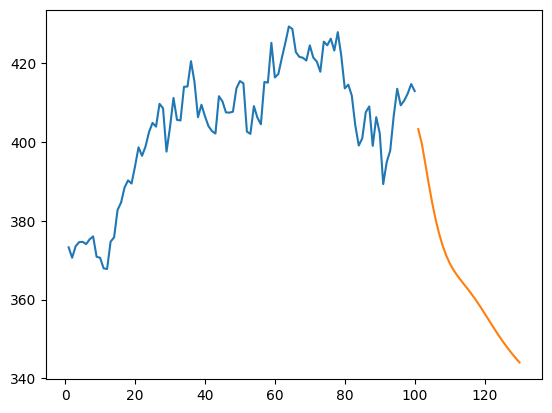

In [37]:
plt.plot(day_new,scaler.inverse_transform(combined_df2[3514:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))